In [82]:
import pandas as pd
import numpy as np
import seaborn as sns

In [57]:

##WHEN WE START TRAIN/TEST SPLIT REF.: https://stackabuse.com/implementing-pca-in-python-with-scikit-learn/


In [58]:
initData = pd.read_csv("numeric_data_for_pca_0225.csv")
initData.head()

,Unnamed: 0,maxLoad,stressMaxLoad,strainMaxLoad,energyAbsorp,youngsMod,ph,sec_Mn,sec_Mw,sec_polyDisp,sec_calcMass,sec_massRec,doubleFold
0,0,34.670,28.7790,0.051118,0.072340,2274.6,5.065,44.1,127.6,2.890,22.45,71.9,10.0
1,1,12.710,9.7289,0.030050,0.023396,1416.2,4.830,35.9,85.4,2.377,10.53,23.4,10.0
2,2,17.301,13.5850,0.034793,0.034683,2083.7,5.207,20.1,93.4,4.653,20.54,65.8,10.0
3,3,25.879,21.3200,0.044734,0.057662,2015.6,5.165,29.5,91.2,3.094,6.84,21.9,10.0
4,4,14.901,16.1320,0.047622,0.036076,1798.6,6.405,76.8,161.6,2.105,7.92,25.4,10.0


In [59]:
cleanedData = initData.drop(axis=1, columns = "Unnamed: 0")

In [60]:
cleanedData.head()

,maxLoad,stressMaxLoad,strainMaxLoad,energyAbsorp,youngsMod,ph,sec_Mn,sec_Mw,sec_polyDisp,sec_calcMass,sec_massRec,doubleFold
0,34.670,28.7790,0.051118,0.072340,2274.6,5.065,44.1,127.6,2.890,22.45,71.9,10.0
1,12.710,9.7289,0.030050,0.023396,1416.2,4.830,35.9,85.4,2.377,10.53,23.4,10.0
2,17.301,13.5850,0.034793,0.034683,2083.7,5.207,20.1,93.4,4.653,20.54,65.8,10.0
3,25.879,21.3200,0.044734,0.057662,2015.6,5.165,29.5,91.2,3.094,6.84,21.9,10.0
4,14.901,16.1320,0.047622,0.036076,1798.6,6.405,76.8,161.6,2.105,7.92,25.4,10.0


In [61]:
cleanedData.shape

(798, 12)

# Ask Fenella and Andrew youngsMod NaNs (blank cells)

### fill with median or drop or something else

In [69]:
cleanedData[cleanedData.isnull().any(axis=1)]

,maxLoad,stressMaxLoad,strainMaxLoad,energyAbsorp,youngsMod,ph,sec_Mn,sec_Mw,sec_polyDisp,sec_calcMass,sec_massRec,doubleFold
25,10.4470,9.8780,0.011892,0.008230,NaN,4.230,20.1,48.0,2.387,11.96,38.3,2.0
26,7.5063,9.0508,0.014892,0.005414,NaN,4.675,31.5,82.7,2.623,12.39,39.7,10.0
108,11.3620,9.1316,0.027348,0.020288,NaN,4.350,27.1,63.7,2.352,15.41,49.4,2.0
155,17.5230,15.0790,0.018174,0.019482,NaN,4.235,20.2,50.5,2.502,16.36,52.4,1.0
191,14.8050,14.5920,0.019078,0.020130,NaN,4.280,22.1,48.2,2.179,14.45,46.3,1.0
210,15.2010,13.6890,0.020730,0.022244,NaN,4.265,20.3,47.0,2.310,11.39,36.5,1.0
223,10.1550,8.7030,0.015986,0.014588,NaN,4.305,26.9,48.7,1.810,9.38,30.1,3.0
227,22.5820,21.0580,0.030520,0.039486,NaN,4.445,23.3,52.3,2.247,11.70,37.5,3.0
229,12.4400,10.0940,0.014766,0.011928,NaN,4.285,30.6,59.3,1.940,7.42,23.8,2.0
296,17.1970,18.7260,0.036314,0.040734,NaN,4.550,29.7,58.4,1.970,11.76,37.7,10.0


## FOR NOW: drop rows that have nan

In [70]:
cleanedData = cleanedData.dropna()
cleanedData.shape

(773, 12)

In [96]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [113]:
pipeline = Pipeline([
    ('scaling', StandardScaler()), ('normalize', Normalizer())  
])

##

In [114]:
scaleNormPipe = pipeline.fit_transform(cleanedData)

In [128]:
pca = PCA(n_components=5)

In [129]:
pcaFitTransf=pca.fit_transform(scaleNormPipe)

In [130]:
pcaFitTransf

array([[ 0.51291476,  0.61345814, -0.6248229 ,  0.04934081, -0.2169996 ],
       [-0.39252954, -0.76468953, -0.33508218,  0.03223149,  0.03205569],
       [-0.42377274,  0.20207885, -0.61884734, -0.41332111,  0.2366583 ],
       ...,
       [ 0.81049358,  0.2837126 ,  0.00135185,  0.01052738,  0.40554883],
       [ 0.32993407, -0.16006887,  0.04830041, -0.64706819,  0.05639073],
       [ 0.37976602,  0.66751278, -0.15997563, -0.58204769,  0.02885404]])

In [133]:
pca_df = pd.DataFrame(data = pcaFitTransf, columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5'])

In [134]:
pca_df.head()

,PC 1,PC 2,PC 3,PC 4,PC 5
0,0.512915,0.613458,-0.624823,0.049341,-0.217000
1,-0.392530,-0.764690,-0.335082,0.032231,0.032056
2,-0.423773,0.202079,-0.618847,-0.413321,0.236658
3,0.179317,-0.876439,-0.037555,0.003487,0.407587
4,0.307332,-0.655872,-0.267431,0.306758,-0.145918


In [142]:
y = pca_df.columns

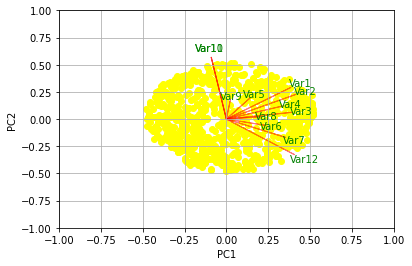

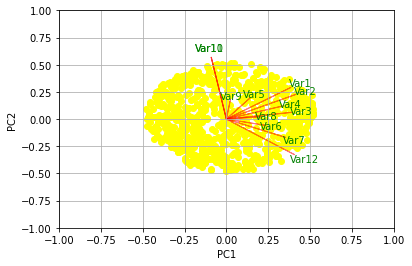

In [149]:

# iris = datasets.load_iris()
# X = iris.data
# y = iris.target

# # In general, it's a good idea to scale the data prior to PCA.

# X=scaler.fit_transform(X)    
# pca = PCA()
# x_new = pca.fit_transform(X)
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = "yellow")
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1)) #PCA 1
    plt.ylabel("PC{}".format(2)) #PCA 2
    plt.grid()

#Call the function. Use only the 2 PCs.
myplot(pcaFitTransf[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = "yellow")
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

#Call the function. Use only the 2 PCs.
myplot(pcaFitTransf[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

In [138]:
# ###Loading Plot

# # Plot explained variance
# fig, ax = pca.plot()

# # Scatter first 5 PCs
# fig, ax = pca.scatter()

# # Make biplot with the number of features
# fig, ax = pca.biplot(n_feat=11)

AttributeError: 'PCA' object has no attribute 'plot'

In [137]:
###Scree Plot

import matplotlib.pyplot as plt

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'n_components_'

In [103]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(cleanedData)
# ##reference: https://datascienceplus.com/principal-component-analysis-pca-with-python/

In [15]:
#scaled_data = scaler.transform(cleanedData)

In [18]:
#scaled_data[0]

array([ 0.58170594,  0.49045049,  0.75063389,  0.40009581, -0.42327446,
        0.18428112,  0.83909082,  0.46320168, -0.0808533 ,  1.60086061,
        1.5968019 ,  0.83093775])